In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
from env import get_connection
import warnings
import acquire as a
warnings.filterwarnings("ignore")


In [2]:
query = """
        SELECT sale_id, sale_date, store_id, item_id, sale_amount, item_brand, 
        item_name, item_price, store_address, store_zipcode, store_city, store_state
        FROM sales
        JOIN items USING(item_id)
        JOIN stores USING (store_id);
        """
df = pd.read_sql(query, get_connection('tsa_item_demand'))

In [3]:
df.head()

,sale_id,sale_date,store_id,item_id,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,1,2013-01-01,1,1,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,2,2013-01-02,1,1,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,3,2013-01-03,1,1,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,4,2013-01-04,1,1,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,5,2013-01-05,1,1,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


Convert date column to datetime format.

In [4]:
# Reassign the sale_date column to be a datetime type
df.sale_date = pd.to_datetime(df.sale_date)
# Sort rows by the date and then set the index as that date
df = df.set_index("sale_date").sort_index()

In [5]:
df.head()

,sale_id,store_id,item_id,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,
2013-01-01,1,1,1,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,295813,3,17,26,Ducal,Ducal Refried Red Beans,1.16,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,125995,10,7,32,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,8503 NW Military Hwy,78231,San Antonio,TX
2013-01-01,314073,3,18,45,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,332333,3,19,34,Careone,Careone Family Comb Set - 8 Ct,0.74,2118 Fredericksburg Rdj,78201,San Antonio,TX


Plot the distribution of sale_amount and item_price.

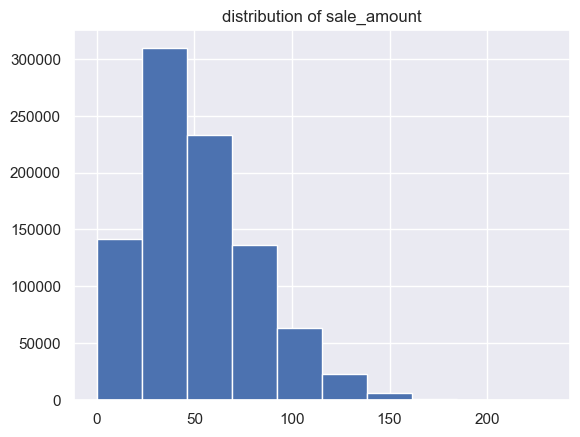

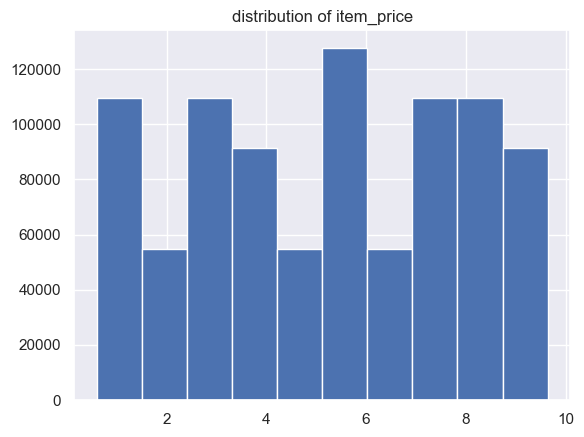

In [6]:
num_cols = ['sale_amount', 'item_price']
for col in num_cols:
    
    plt.hist(df[col])
    plt.title(f'distribution of {col}')
    plt.show()

Set the index to be the datetime variable.

In [7]:
# df = df.set_index("sale_date").sort_index()

Add a 'month' and 'day of week' column to your dataframe.

In [8]:
df.index.strftime('%A, %B %Y')

Index(['Tuesday, January 2013', 'Tuesday, January 2013',
       'Tuesday, January 2013', 'Tuesday, January 2013',
       'Tuesday, January 2013', 'Tuesday, January 2013',
       'Tuesday, January 2013', 'Tuesday, January 2013',
       'Tuesday, January 2013', 'Tuesday, January 2013',
       ...
       'Sunday, December 2017', 'Sunday, December 2017',
       'Sunday, December 2017', 'Sunday, December 2017',
       'Sunday, December 2017', 'Sunday, December 2017',
       'Sunday, December 2017', 'Sunday, December 2017',
       'Sunday, December 2017', 'Sunday, December 2017'],
      dtype='object', name='sale_date', length=913000)

In [9]:
df['month'] = df.index.strftime('%B')

In [10]:
df['day_of_week'] = df.index.strftime('%A')

In [11]:
df.head()

,sale_id,store_id,item_id,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,1,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday
2013-01-01,295813,3,17,26,Ducal,Ducal Refried Red Beans,1.16,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday
2013-01-01,125995,10,7,32,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday
2013-01-01,314073,3,18,45,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday
2013-01-01,332333,3,19,34,Careone,Careone Family Comb Set - 8 Ct,0.74,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday


Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [27]:
df['sales_total'] = df[["sale_amount"]].multiply(df["item_price"], axis="index")

In [28]:
df.head()

,sale_id,store_id,item_id,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,
2013-01-01,1,1,1,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,295813,3,17,26,Ducal,Ducal Refried Red Beans,1.16,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,125995,10,7,32,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,314073,3,18,45,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,332333,3,19,34,Careone,Careone Family Comb Set - 8 Ct,0.74,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16


Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

Convert date column to datetime format.

In [14]:
germany = a.get_germany_data()
germany.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [15]:
germany.Date = pd.to_datetime(germany.Date)
germany.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


Plot the distribution of each of your variables.

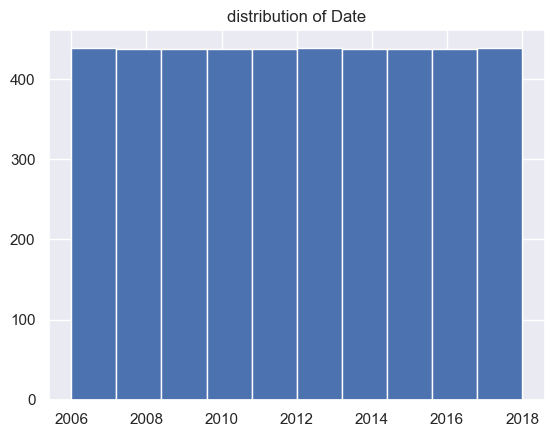

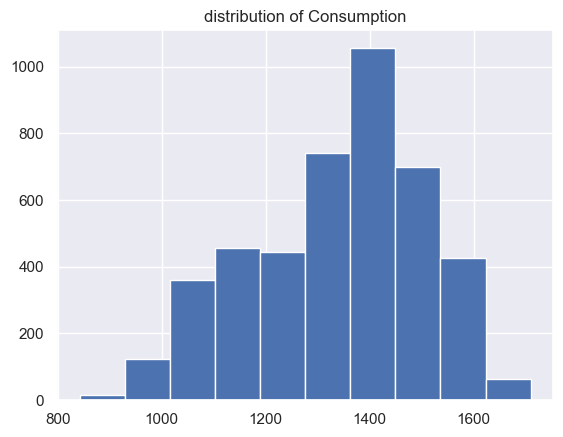

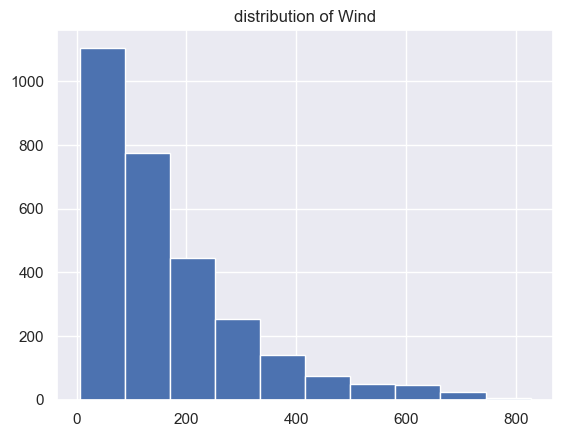

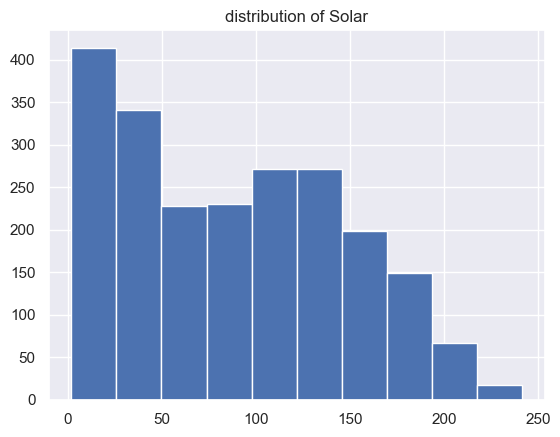

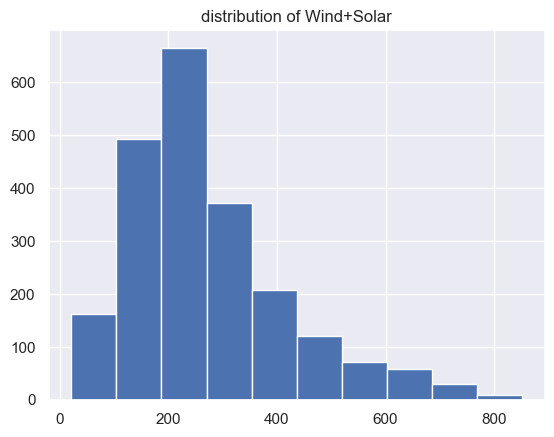

In [16]:

for col in germany:
    
    plt.hist(germany[col])
    plt.title(f'distribution of {col}')
    plt.show()

Set the index to be the datetime variable.

In [17]:
germany = germany.set_index("Date").sort_index()

In [18]:
germany.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


Add a month and a year column to your dataframe.

In [19]:
germany['month'] = germany.index.strftime('%B')

In [20]:
germany['year'] = germany.index.strftime('%Y')

In [21]:
germany.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


Fill any missing values.

In [29]:
germany.fillna(0,inplace=True)

In [30]:
germany.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.